Nombre d'avis: 48 (332 avis)
Nom de l'appareil: Apple MACBOOK AIR 13" 256 GO SSD 8 GO RAM PUCE M1 GRIS SIDÉRAL
------
Nombre d'avis: 3 (3 avis)
Nom de l'appareil: Hisense W1014FQRT
------
Nombre d'avis: 46 (61 avis)
Nom de l'appareil: Lenovo IdeaPad 3 17ITL6
------
Nombre d'avis: 44 (5 avis)
Nom de l'appareil: Samsung TQ55QN90C 120hz Neo QLED Anti-reflets 139cm 2023
------
Nombre d'avis: 42 (117 avis)
Nom de l'appareil: Samsung Galaxy S22 128Go Noir 5G
------
Nombre d'avis: 49 (9 avis)
Nom de l'appareil: Samsung NV7B40403CK/U1
------
Nombre d'avis: 48 (98 avis)
Nom de l'appareil: Marshall Acton II Noir
------
Nombre d'avis: 48 (56 avis)
Nom de l'appareil: Kenwood KMIX EDITION KMX760BC BLACK CHROME + ACCESSOIRE HACHOIR KAX962ME
------
Nombre d'avis: 42 (13 avis)
Nom de l'appareil: Xiaomi Electric Scooter 4 FR NOIR
------
Nombre d'avis: 46 (41 avis)
Nom de l'appareil: Dji Mini 3 Pro + Smart Controller (nouvelle radiocommande avec écran)
------
Nombre d'avis: 42 (17 avis)
Nom de l'apparei

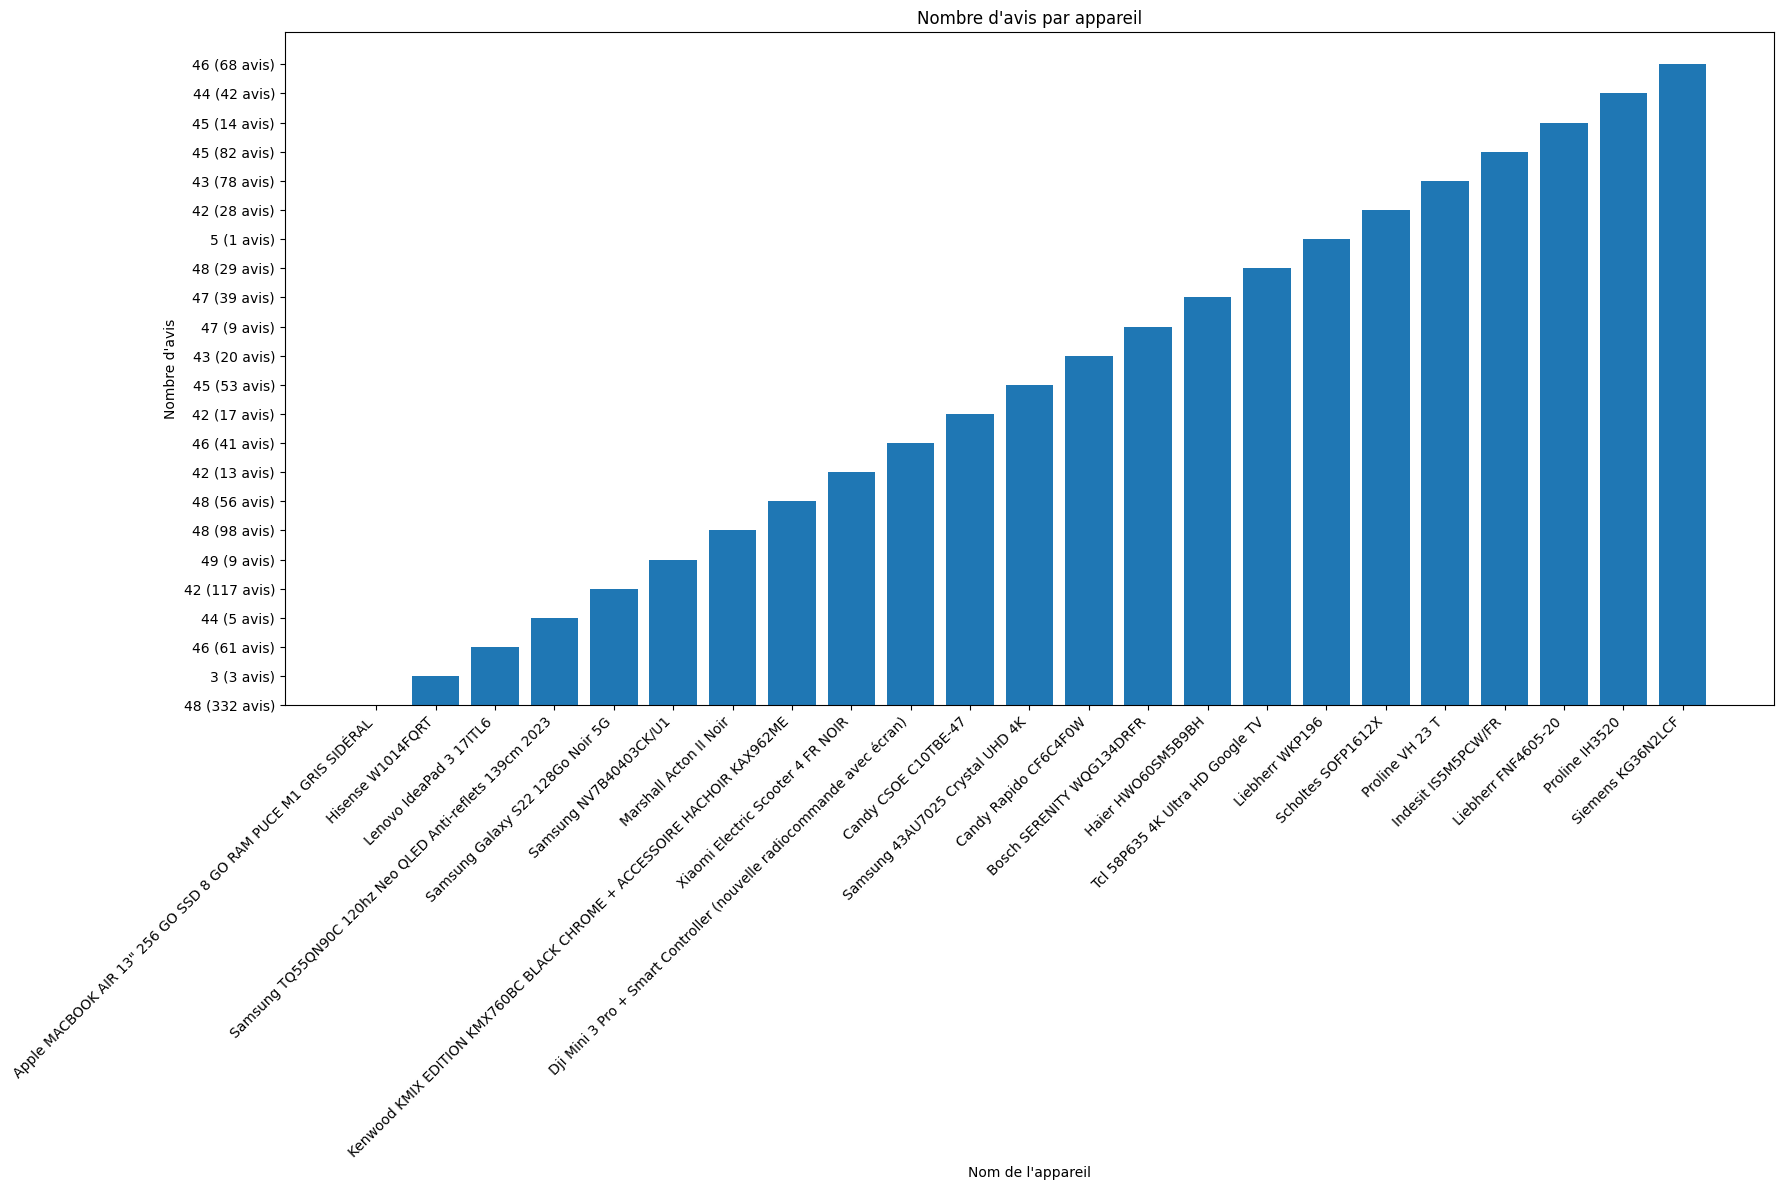

                                    Nom de l'appareil  Nombre d'avis
0   Apple MACBOOK AIR 13" 256 GO SSD 8 GO RAM PUCE...  48 (332 avis)
1                                   Hisense W1014FQRT     3 (3 avis)
2                             Lenovo IdeaPad 3 17ITL6   46 (61 avis)
3   Samsung TQ55QN90C 120hz Neo QLED Anti-reflets ...    44 (5 avis)
4                    Samsung Galaxy S22 128Go Noir 5G  42 (117 avis)
5                              Samsung NV7B40403CK/U1    49 (9 avis)
6                              Marshall Acton II Noir   48 (98 avis)
7   Kenwood KMIX EDITION KMX760BC BLACK CHROME + A...   48 (56 avis)
8                   Xiaomi Electric Scooter 4 FR NOIR   42 (13 avis)
9   Dji Mini 3 Pro + Smart Controller (nouvelle ra...   46 (41 avis)
10                               Candy CSOE C10TBE-47   42 (17 avis)
11                    Samsung 43AU7025 Crystal UHD 4K   45 (53 avis)
12                              Candy Rapido CF6C4F0W   43 (20 avis)
13                          Bosch 

In [4]:
import json
import os
import tkinter as tk
import pandas as pd
from bs4 import BeautifulSoup
import requests as rq
import matplotlib.pyplot as plt

url = "https://www.darty.com/"
response = rq.get(url)
html_content = response.content

# Utiliser le répertoire de travail actuel pour le fichier JSON
json_path = os.path.join(os.getcwd(), "Information.json")

soup = BeautifulSoup(html_content, 'html.parser')

appareils = soup.find_all('article', class_='product')
data = []

for appareil in appareils:
    avis_appareil = appareil.find('div', class_='reviews')
    if avis_appareil:
     
        nombre_avis_texte = avis_appareil.text.replace(',', '').strip()
        nombre_avis = nombre_avis_texte
        print(f"Nombre d'avis: {nombre_avis}")

        nom_app_element = appareil.find('a', class_='name ellipsis')
        if nom_app_element:
            nom_appareil = nom_app_element.text.strip()
            print(f"Nom de l'appareil: {nom_appareil}")
            data.append({'Nom de l\'appareil': nom_appareil, 'Nombre d\'avis': nombre_avis})
            print("------")
        with open(json_path, "w") as file:
            json.dump(data, file)

df = pd.DataFrame(data)

plt.figure(figsize=(18, 12))
plt.bar(df['Nom de l\'appareil'], df['Nombre d\'avis'])
plt.xlabel('Nom de l\'appareil')
plt.ylabel('Nombre d\'avis')
plt.title('Nombre d\'avis par appareil')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(df)
